In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [2]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std


## Assumptions of Multivariable Linear Regression
1. linear relationship
    - features in regression need linear relationship with outcome
2. multivariate normality
    - errors from model should be normally distributed
3. homoscedasticity
    - distribution of error terms (its scedasticity) should be consistent for all predicted values (or homoscedastic)
4. low multicollinearity
    - correlations among features should be low or nonexistent

In [3]:
data_o = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')

In [4]:
data = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(data_o), columns=data_o.columns)

In [5]:
# Instantiate and fit our model.
regr = LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
regr.coef_

array([[ 0.53277975,  0.3681531 , -0.00464421]])

In [7]:
regr.intercept_

array([0.05396116])

In [8]:
regr.score(X, Y)

0.8972106381789521

In [9]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,0.000000,0.775786,0.762097,0.605981,0.807087
1,0.005025,0.148123,0.792339,0.394019,0.346457
2,0.010050,0.055800,0.925403,0.606860,0.303150
3,0.015075,0.509976,0.832661,0.511873,0.665354
4,0.020101,0.609063,0.217742,0.510994,0.444882


In [10]:
np.corrcoef(data.TV, data.Sales)

array([[1.        , 0.78222442],
       [0.78222442, 1.        ]])

In [11]:
np.corrcoef(data.Radio, data.Sales)

array([[1.        , 0.57622257],
       [0.57622257, 1.        ]])

In [12]:
np.corrcoef(data.Newspaper, data.Sales)

array([[1.        , 0.22829903],
       [0.22829903, 1.        ]])

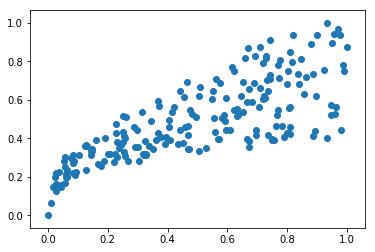

In [13]:
plt.scatter(data.TV, data.Sales)

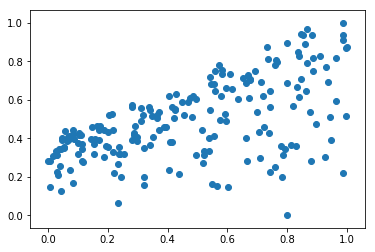

In [14]:
plt.scatter(data.Radio, data.Sales)

In [15]:
data['TV_radio'] = data.TV + data.Radio

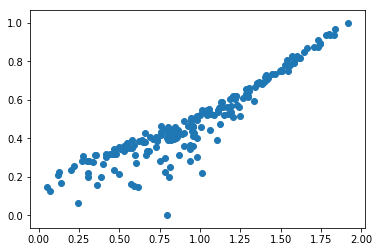

In [16]:
plt.scatter(data.TV_radio, data.Sales)

In [17]:
np.corrcoef(data.TV_radio, data.Sales)

array([[1.        , 0.93301923],
       [0.93301923, 1.        ]])

In [36]:
data['TVsqrt_radio'] = data.TV_sqrt + data.Radio

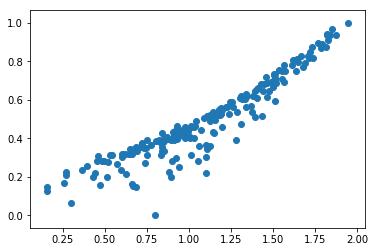

In [37]:
plt.scatter(data.TVsqrt_radio, data.Sales)

In [38]:
np.corrcoef(data.TVsqrt_radio, data.Sales)

array([[1.        , 0.93659307],
       [0.93659307, 1.        ]])

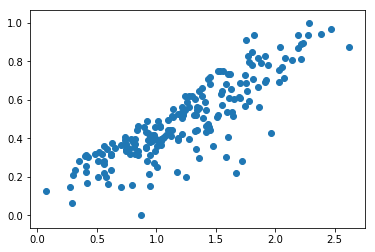

In [18]:
plt.scatter(data.TV + data.Radio + data.Newspaper, data.Sales)

In [19]:
np.corrcoef(data.TV + data.Radio + data.Newspaper, data.Sales)

array([[1.       , 0.8579247],
       [0.8579247, 1.       ]])

In [26]:
# Instantiate and fit our model.
regr = LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['Radio','TV_sqrt']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
regr.coef_

array([[0.37698604, 0.61218972]])

In [28]:
regr.intercept_

array([-0.06672399])

In [29]:
regr.score(X,Y)

0.9256990255603927

In [30]:
predicted = regr.predict(X).ravel()

In [31]:
actual = data['Sales']

In [32]:
residual = actual = predicted

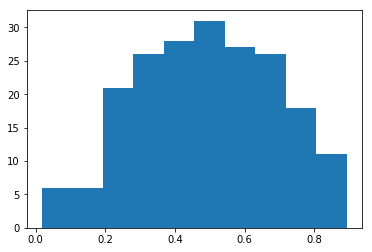

In [33]:
plt.hist(residual)
plt.show()

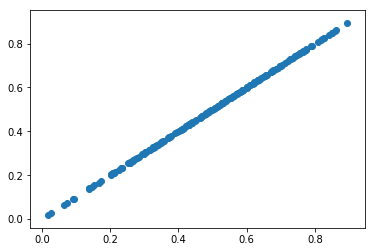

In [34]:
plt.scatter(predicted, residual)

In [52]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Sales ~ TV+Radio+Newspaper+TV_sqrt'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data).fit()

In [53]:
lm.params

Intercept   -0.126977
TV          -0.301391
Radio        0.383234
Newspaper   -0.001269
TV_sqrt      0.946277
dtype: float64

In [54]:
lm.pvalues

Intercept    1.581567e-08
TV           8.082886e-04
Radio        1.204847e-68
Newspaper    9.535675e-01
TV_sqrt      6.471429e-18
dtype: float64

In [55]:
lm.rsquared

0.9298706573647809

In [50]:
lm.conf_int()

,0,1
Intercept,-0.169420,-0.084533
TV,-0.476052,-0.126730
Radio,0.355594,0.410874
Newspaper,-0.044197,0.041658
TV_sqrt,0.750440,1.142114


In [1]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

NameError: name 'pd' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

In [ ]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

In [ ]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})

# Fit our model.
Y = music.jazz
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .01

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()